## Week-1 Assignment
Fill the missing places wherever TO DO is mentioned and also understnad what has been done properly

Also report :
- Asset with highest expected return:
- Asset with highest volatility:
- If there is any negatively correlated pairs (corr < -0.1) and if yes also mention which are they

Do not use Chatgpt . It is a simple assignment. Make a copy of this colab notebook and do your changes and submit it as `Assignment1_yourrollno.ipnyb`


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt


In [ ]:
TICKERS = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']  # you can change these take any 3 assets that are in yfinance
print("Selected assets:", TICKERS)


Selected assets: ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']


In [ ]:
prices = yf.download(TICKERS, period="3y") #downlaod data of 3yrs
prices = prices.xs('Close', axis=1, level=0)
# TO DO :Clean missing values using dropna and fillna
prices = prices.fillna(method='ffill')
prices.tail(10)

/tmp/ipython-input-3976821899.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(TICKERS, period="3y") #downlaod data of 3yrs
[*********************100%***********************]  3 of 3 completed
/tmp/ipython-input-3976821899.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  prices = prices.fillna(method='ffill')


Ticker,HDFCBANK.NS,RELIANCE.NS,TCS.NS
Date,,,
2025-12-01,1002.099976,1566.099976,3133.399902
2025-12-02,989.799988,1546.300049,3135.699951
2025-12-03,1000.500000,1538.800049,3180.000000
2025-12-04,997.200012,1535.599976,3229.199951
2025-12-05,1003.299988,1540.599976,3238.199951
2025-12-08,1003.099976,1543.000000,3236.500000
2025-12-09,997.099976,1529.400024,3208.300049
2025-12-10,989.799988,1536.900024,3189.199951
2025-12-11,1000.299988,1545.000000,3191.899902


In [ ]:
# TO DO : Simple Returns (Make sure to drop first row or NaN values as for first row we dont have any previous data)
simple_returns = prices.pct_change().dropna()

# TO DO : Log Returns (Make sure to drop first row or NaN values as for first row we dont have any previous data)
log_returns = np.log(prices / prices.shift(1)).dropna()

print("\nSimple Returns :")
display(simple_returns.head(10))

print("\nLog Returns :")
display(log_returns.head(10))


Simple Returns :


Ticker,HDFCBANK.NS,RELIANCE.NS,TCS.NS
Date,,,
2022-12-13,0.002768,0.004554,0.013891
2022-12-14,0.008463,-0.003619,0.009979
2022-12-15,-0.018318,-0.014204,-0.017903
2022-12-16,0.004811,-0.004945,-0.019621
2022-12-19,0.003110,0.013135,-0.011789
2022-12-20,-0.006901,0.008656,0.013085
2022-12-21,-0.009673,-0.014227,0.007583
2022-12-22,-0.003431,-0.002592,-0.002708
2022-12-23,-0.008933,-0.029327,-0.009617



Log Returns :


Ticker,HDFCBANK.NS,RELIANCE.NS,TCS.NS
Date,,,
2022-12-13,0.002764,0.004544,0.013795
2022-12-14,0.008428,-0.003626,0.009929
2022-12-15,-0.018488,-0.014306,-0.018065
2022-12-16,0.004799,-0.004957,-0.019816
2022-12-19,0.003106,0.013050,-0.011859
2022-12-20,-0.006925,0.008619,0.013000
2022-12-21,-0.009720,-0.014329,0.007555
2022-12-22,-0.003437,-0.002596,-0.002711
2022-12-23,-0.008973,-0.029766,-0.009664


In [ ]:
TRADING_DAYS = 252

# TO DO : Annual expected return (mean log return × 252)
expected_return =log_returns.mean() * 252

# TO DO : Annualized volatility (std of returns × sqrt(252))
volatility =log_returns.std() * np.sqrt(252)

print("\n Annualized Expected Return")
display(expected_return)

print("\n Annualized Volatility (Risk)")
display(volatility)


 Annualized Expected Return


,0
Ticker,
HDFCBANK.NS,0.080063
RELIANCE.NS,0.090244
TCS.NS,0.023039



 Annualized Volatility (Risk)


,0
Ticker,
HDFCBANK.NS,0.185974
RELIANCE.NS,0.200640
TCS.NS,0.196810


In [ ]:
# TO DO : Covariance (annualized)- first find daily covariance (using log return) and then find the annual covariance
cov_daily =log_returns.cov()
cov_annual =cov_daily * 252

# TO DO : Correlation matrix
corr =log_returns.corr()

print("\n Covariance Matrix (Annualized) ")
display(cov_annual)

print("\n Correlation Matrix ")
display(corr)



 Covariance Matrix (Annualized) 


Ticker,HDFCBANK.NS,RELIANCE.NS,TCS.NS
Ticker,,,
HDFCBANK.NS,0.034586,0.013702,0.005362
RELIANCE.NS,0.013702,0.040256,0.011044
TCS.NS,0.005362,0.011044,0.038734



 Correlation Matrix 


Ticker,HDFCBANK.NS,RELIANCE.NS,TCS.NS
Ticker,,,
HDFCBANK.NS,1.000000,0.367199,0.146484
RELIANCE.NS,0.367199,1.000000,0.279690
TCS.NS,0.146484,0.279690,1.000000


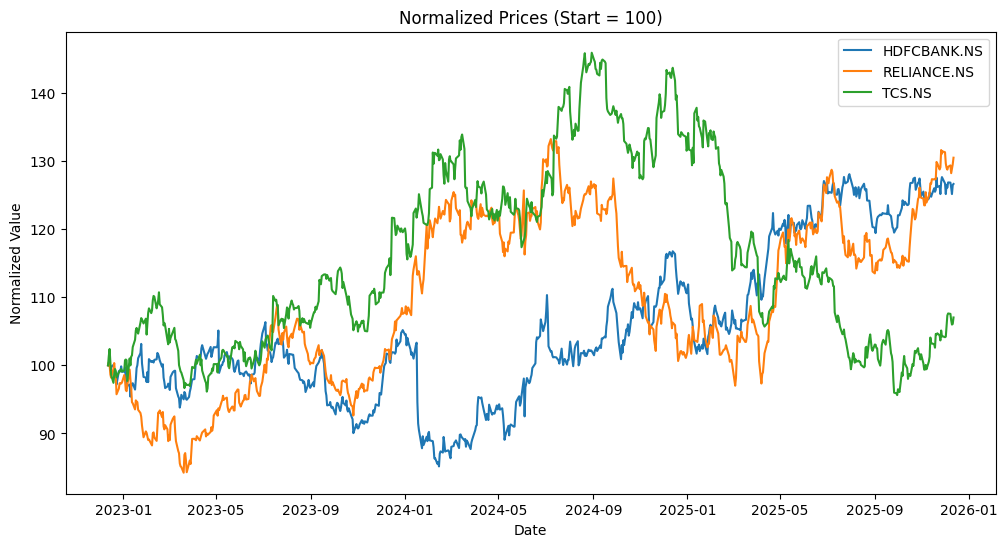

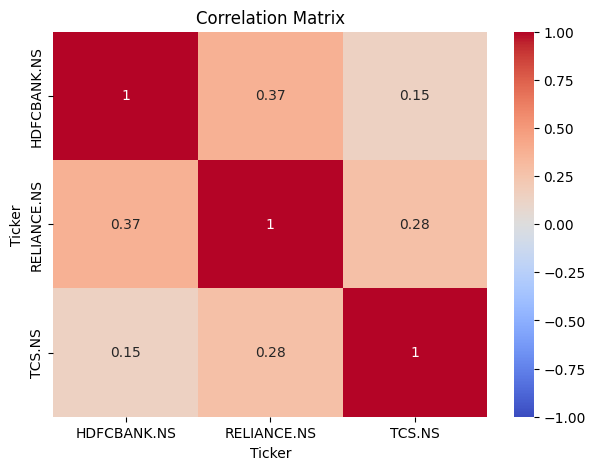

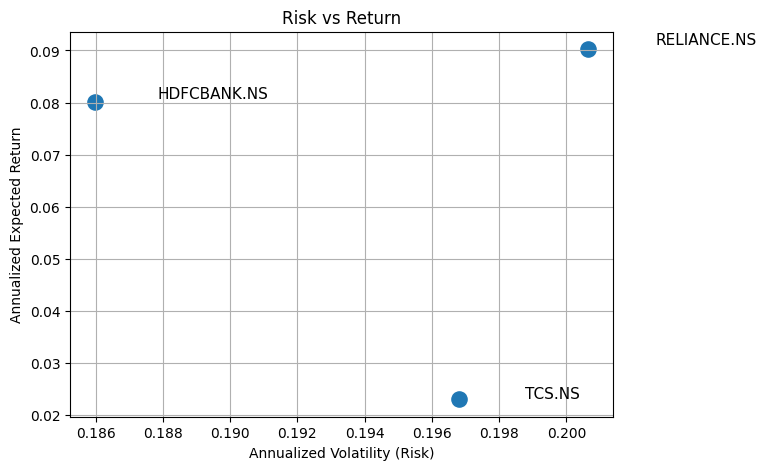

In [ ]:
#Visualization
norm_prices = prices / prices.iloc[0] * 100
plt.figure(figsize=(12,6))
for col in norm_prices.columns:
    plt.plot(norm_prices.index, norm_prices[col], label=col)

plt.title("Normalized Prices (Start = 100)")
plt.ylabel("Normalized Value")
plt.xlabel("Date")
plt.legend()
plt.show()

# 2) Correlation Heatmap
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

# 3) Risk vs Return Scatter
plt.figure(figsize=(7,5))
plt.scatter(volatility, expected_return, s=120)

for t in TICKERS:
    plt.text(volatility[t]*1.01, expected_return[t]*1.01, t, fontsize=11)

plt.xlabel("Annualized Volatility (Risk)")
plt.ylabel("Annualized Expected Return")
plt.title("Risk vs Return")
plt.grid(True)
plt.show()

RELIANCE.NS has highest expected return , but it also has hughest volatility. HDFCBANK.NS has high return for relatively low risk. TCS.NS has high volatility and low return. There is no negative correlation between stocks